# 01. Importing Libraries & Data

## 01.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Display graphs in notebook

%matplotlib inline

In [3]:
# Create path

path = r'/Users/david/Desktop/CF/Data Immersion/Achievement 6 - Advnaced Analytics & Dashboard Design'

In [4]:
path

'/Users/david/Desktop/CF/Data Immersion/Achievement 6 - Advnaced Analytics & Dashboard Design'

## 01.2 Import Data

In [5]:
# Import 'bnb_cdmx_080922.pkl' pickle as 'bnb_MC' dataframe

bnb_MC = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '09_Sep_2022', 'bnb_cdmx_080922.pkl'))

In [6]:
# List 'bnb_MC' columns

list(bnb_MC.columns)

['listing_id',
 'listing_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'acceptance_rate',
 'superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bedrooms',
 'price',
 'min_nights',
 'max_nights',
 'has_availability',
 'availability_365',
 'revs_num',
 'first_rev',
 'last_rev',
 'review_scores_rating',
 'reviews_per_month',
 'bookings_num',
 'host_loc',
 'host_nh',
 'nh',
 'nh_cleansed']

# 02. Data Cleaning

## 02.1 Drop Columns

In [7]:
# Drop columns

bnb_MC = bnb_MC.drop(columns = ['listing_url', 'host_url', 'accommodates', 'max_nights', 'has_availability', 'last_rev', 'review_scores_rating', 'host_loc', 'host_nh', 'nh'])

In [8]:
bnb_MC.head(5)

,listing_id,host_id,host_name,host_since,acceptance_rate,superhost,host_listings_count,host_identity_verified,latitude,longitude,room_type,bedrooms,price,min_nights,availability_365,revs_num,first_rev,reviews_per_month,bookings_num,nh_cleansed
0,15511977,93364273,Abraham,2016-09-03,NaN,f,2,f,19.41095,-99.24418,Private room,1,800,1,179,1,2018-03-19,0.02,365,Miguel Hidalgo
1,44616,196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,66,f,9,t,19.41162,-99.17794,Entire home/apt,5,18000,1,347,56,2011-11-09,0.43,365,Cuauhtémoc
2,34776449,2954577,Lazaro Alejandro,2012-07-16,100,t,3,t,19.42641,-99.22591,Private room,1,1779,1,222,5,2019-07-04,0.14,365,Miguel Hidalgo
3,56074,265650,Maris,2010-10-19,90,t,2,t,19.43977,-99.15605,Entire home/apt,1,650,2,344,72,2011-04-02,0.53,365,Cuauhtémoc
4,58955,282620,Laura,2010-11-09,29,f,1,t,19.42113,-99.15955,Entire home/apt,1,2019,7,47,45,2011-12-26,0.35,365,Cuauhtémoc


In [9]:
bnb_MC.shape

(17679, 20)

In [10]:
list(bnb_MC.columns)

['listing_id',
 'host_id',
 'host_name',
 'host_since',
 'acceptance_rate',
 'superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'room_type',
 'bedrooms',
 'price',
 'min_nights',
 'availability_365',
 'revs_num',
 'first_rev',
 'reviews_per_month',
 'bookings_num',
 'nh_cleansed']

## 02.1 Missing Values

In [11]:
bnb_MC.isnull().sum()

listing_id                   0
host_id                      0
host_name                    0
host_since                   0
acceptance_rate           1100
superhost                    0
host_listings_count          0
host_identity_verified       0
latitude                     0
longitude                    0
room_type                    0
bedrooms                   450
price                        0
min_nights                   0
availability_365             0
revs_num                     0
first_rev                    0
reviews_per_month            0
bookings_num                 0
nh_cleansed                  0
dtype: int64

In [12]:
bnb_MC.describe()

,listing_id,host_id,host_listings_count,latitude,longitude,bedrooms,price,min_nights,availability_365,revs_num,reviews_per_month,bookings_num
count,1.767900e+04,1.767900e+04,17679.000000,17679.000000,17679.000000,17229.000000,17679.000000,17679.000000,17679.000000,17679.000000,17679.000000,17679.000000
mean,7.195995e+16,1.568635e+08,15.656938,19.403550,-99.169073,1.532706,1356.202840,3.548730,238.131738,38.727586,1.586033,365.000057
std,1.940390e+17,1.323854e+08,51.061471,0.043150,0.036069,1.127593,8272.112796,22.474166,122.269245,59.819655,2.014909,0.007521
min,4.461600e+04,7.365000e+03,0.000000,19.094680,-99.374010,1.000000,0.000000,1.000000,0.000000,1.000000,0.010000,365.000000
25%,2.586239e+07,4.354205e+07,1.000000,19.385555,-99.180520,1.000000,500.000000,1.000000,140.000000,5.000000,0.360000,365.000000
50%,4.091962e+07,1.190519e+08,2.000000,19.414350,-99.168590,1.000000,894.000000,2.000000,288.000000,16.000000,1.000000,365.000000
75%,5.132685e+07,2.466545e+08,8.000000,19.431581,-99.154670,2.000000,1442.000000,2.000000,353.000000,45.000000,2.210000,365.000000
max,6.507724e+17,4.641013e+08,436.000000,19.561010,-98.962270,50.000000,999998.000000,1125.000000,365.000000,820.000000,52.580000,366.000000


In [13]:
bnb_MC.describe()

,listing_id,host_id,host_listings_count,latitude,longitude,bedrooms,price,min_nights,availability_365,revs_num,reviews_per_month,bookings_num
count,1.767900e+04,1.767900e+04,17679.000000,17679.000000,17679.000000,17229.000000,17679.000000,17679.000000,17679.000000,17679.000000,17679.000000,17679.000000
mean,7.195995e+16,1.568635e+08,15.656938,19.403550,-99.169073,1.532706,1356.202840,3.548730,238.131738,38.727586,1.586033,365.000057
std,1.940390e+17,1.323854e+08,51.061471,0.043150,0.036069,1.127593,8272.112796,22.474166,122.269245,59.819655,2.014909,0.007521
min,4.461600e+04,7.365000e+03,0.000000,19.094680,-99.374010,1.000000,0.000000,1.000000,0.000000,1.000000,0.010000,365.000000
25%,2.586239e+07,4.354205e+07,1.000000,19.385555,-99.180520,1.000000,500.000000,1.000000,140.000000,5.000000,0.360000,365.000000
50%,4.091962e+07,1.190519e+08,2.000000,19.414350,-99.168590,1.000000,894.000000,2.000000,288.000000,16.000000,1.000000,365.000000
75%,5.132685e+07,2.466545e+08,8.000000,19.431581,-99.154670,2.000000,1442.000000,2.000000,353.000000,45.000000,2.210000,365.000000
max,6.507724e+17,4.641013e+08,436.000000,19.561010,-98.962270,50.000000,999998.000000,1125.000000,365.000000,820.000000,52.580000,366.000000


#### 'acceptance_rate' and 'bedrooms' missing values will be replaced with the (varaibale's) means.

In [14]:
bnb_MC['acceptance_rate'].fillna(91, inplace = True)

In [15]:
bnb_MC['bedrooms'].fillna(91, inplace = True)

In [16]:
bnb_MC.isnull().sum()

listing_id                0
host_id                   0
host_name                 0
host_since                0
acceptance_rate           0
superhost                 0
host_listings_count       0
host_identity_verified    0
latitude                  0
longitude                 0
room_type                 0
bedrooms                  0
price                     0
min_nights                0
availability_365          0
revs_num                  0
first_rev                 0
reviews_per_month         0
bookings_num              0
nh_cleansed               0
dtype: int64

# 03 Deriving New Variables & Changing Data Types

In [17]:
# As per findings in Task 6.4, the 'host_listings_count' variable might be compromised; 
# if necessary, this variable will be recalculated, but as of now, the variabel will be used as is.

# Cehck 'host_listings_count' max value

print(bnb_MC['host_listings_count'].max())

436


In [18]:
# Verify data types of variabels to subset numerical variables only

bnb_MC.dtypes

listing_id                  int64
host_id                     int64
host_name                  object
host_since                 object
acceptance_rate            object
superhost                  object
host_listings_count         int64
host_identity_verified     object
latitude                  float64
longitude                 float64
room_type                  object
bedrooms                    Int64
price                       int64
min_nights                  int64
availability_365            int64
revs_num                    int64
first_rev                  object
reviews_per_month         float64
bookings_num                int64
nh_cleansed                object
dtype: object

In [19]:
# Change data types of 'acceptance_rate'

bnb_MC['acceptance_rate'] = bnb_MC['acceptance_rate'].astype('int64')

In [20]:
# verify changes in data types

bnb_MC.dtypes

listing_id                  int64
host_id                     int64
host_name                  object
host_since                 object
acceptance_rate             int64
superhost                  object
host_listings_count         int64
host_identity_verified     object
latitude                  float64
longitude                 float64
room_type                  object
bedrooms                    Int64
price                       int64
min_nights                  int64
availability_365            int64
revs_num                    int64
first_rev                  object
reviews_per_month         float64
bookings_num                int64
nh_cleansed                object
dtype: object

In [21]:
# The 'room_type' variable will be included in here in the form of numbers so the algorithm 
# can analyze it as well

# Check for 'room_type' unique values

list(bnb_MC.room_type.unique())

['Private room', 'Entire home/apt', 'Hotel room', 'Shared room']

In [22]:
# Categorize romm types as follows:
# 1 = 'Private room'
# 2 = 'Entire home/apt'
# 3 = 'Hotel room'
# 4 = 'Shared room'

bnb_MC.loc[bnb_MC['room_type'] == 'Private room', 'room_type_code'] = '1'
bnb_MC.loc[bnb_MC['room_type'] == 'Entire home/apt', 'room_type_code'] = '2'
bnb_MC.loc[bnb_MC['room_type'] == 'Hotel room', 'room_type_code'] = '3'
bnb_MC.loc[bnb_MC['room_type'] == 'Shared room', 'room_type_code'] = '4'

In [23]:
# Verify new variable

bnb_MC.head(5)

,listing_id,host_id,host_name,host_since,acceptance_rate,superhost,host_listings_count,host_identity_verified,latitude,longitude,...,bedrooms,price,min_nights,availability_365,revs_num,first_rev,reviews_per_month,bookings_num,nh_cleansed,room_type_code
0,15511977,93364273,Abraham,2016-09-03,91,f,2,f,19.41095,-99.24418,...,1,800,1,179,1,2018-03-19,0.02,365,Miguel Hidalgo,1
1,44616,196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,66,f,9,t,19.41162,-99.17794,...,5,18000,1,347,56,2011-11-09,0.43,365,Cuauhtémoc,2
2,34776449,2954577,Lazaro Alejandro,2012-07-16,100,t,3,t,19.42641,-99.22591,...,1,1779,1,222,5,2019-07-04,0.14,365,Miguel Hidalgo,1
3,56074,265650,Maris,2010-10-19,90,t,2,t,19.43977,-99.15605,...,1,650,2,344,72,2011-04-02,0.53,365,Cuauhtémoc,2
4,58955,282620,Laura,2010-11-09,29,f,1,t,19.42113,-99.15955,...,1,2019,7,47,45,2011-12-26,0.35,365,Cuauhtémoc,2


In [24]:
bnb_MC['room_type_code'].value_counts()

2    11490
1     5863
4      180
3      146
Name: room_type_code, dtype: int64

In [25]:
list(bnb_MC.room_type_code.unique())

['1', '2', '3', '4']

In [26]:
# The 'nh_cleansed' variable will be derived in form of codesso the algorithm can analyze it too

list(bnb_MC.nh_cleansed.unique())

['Miguel Hidalgo',
 'Cuauhtémoc',
 'Coyoacán',
 'Benito Juárez',
 'Cuajimalpa de Morelos',
 'Venustiano Carranza',
 'Álvaro Obregón',
 'Iztapalapa',
 'Tlalpan',
 'La Magdalena Contreras',
 'Gustavo A. Madero',
 'Xochimilco',
 'Iztacalco',
 'Azcapotzalco',
 'Tláhuac',
 'Milpa Alta']

In [27]:
# Categorize teh neighbourhoods as follows:
# 'Miguel Hidalgo' = 1
# 'Cuauhtémoc' = 2
# 'Coyoacán' = 3
# 'Benito Juárez' = 4
# 'Cuajimalpa de Morelos' = 5
# 'Venustiano Carranza' = 6
# 'Álvaro Obregón' = 7
# 'Iztapalapa' = 8
# 'Tlalpan' = 9
# 'La Magdalena Contreras' = 10
# 'Gustavo A. Madero' = 11
# 'Xochimilco' = 12
# 'Iztacalco' = 13
# 'Azcapotzalco' = 14
# 'Tláhuac' = 15
# 'Milpa Alta' = 16

bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Miguel Hidalgo', 'nh_code'] = '1'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Cuauhtémoc', 'nh_code'] = '2'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Coyoacán', 'nh_code'] = '3'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Benito Juárez', 'nh_code'] = '4'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Cuajimalpa de Morelos', 'nh_code'] = '5'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Venustiano Carranza', 'nh_code'] = '6'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Álvaro Obregón', 'nh_code'] = '7'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Iztapalapa', 'nh_code'] = '8'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Tlalpan', 'nh_code'] = '9'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'La Magdalena Contreras', 'nh_code'] = '10'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Gustavo A. Madero', 'nh_code'] = '11'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Xochimilco', 'nh_code'] = '12'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Iztacalco', 'nh_code'] = '13'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Azcapotzalco', 'nh_code'] = '14'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Tláhuac', 'nh_code'] = '15'
bnb_MC.loc[bnb_MC['nh_cleansed'] == 'Milpa Alta', 'nh_code'] = '16'

In [28]:
bnb_MC.head()

,listing_id,host_id,host_name,host_since,acceptance_rate,superhost,host_listings_count,host_identity_verified,latitude,longitude,...,price,min_nights,availability_365,revs_num,first_rev,reviews_per_month,bookings_num,nh_cleansed,room_type_code,nh_code
0,15511977,93364273,Abraham,2016-09-03,91,f,2,f,19.41095,-99.24418,...,800,1,179,1,2018-03-19,0.02,365,Miguel Hidalgo,1,1
1,44616,196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,66,f,9,t,19.41162,-99.17794,...,18000,1,347,56,2011-11-09,0.43,365,Cuauhtémoc,2,2
2,34776449,2954577,Lazaro Alejandro,2012-07-16,100,t,3,t,19.42641,-99.22591,...,1779,1,222,5,2019-07-04,0.14,365,Miguel Hidalgo,1,1
3,56074,265650,Maris,2010-10-19,90,t,2,t,19.43977,-99.15605,...,650,2,344,72,2011-04-02,0.53,365,Cuauhtémoc,2,2
4,58955,282620,Laura,2010-11-09,29,f,1,t,19.42113,-99.15955,...,2019,7,47,45,2011-12-26,0.35,365,Cuauhtémoc,2,2


In [29]:
bnb_MC['nh_code'].value_counts()

2     7544
1     3037
4     2395
3     1245
7      724
9      570
5      520
6      455
11     299
14     268
13     220
8      186
10      95
12      89
15      22
16      10
Name: nh_code, dtype: int64

In [30]:
list(bnb_MC.nh_code.unique())

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16']

In [31]:
# Consistency Check for new variables

bnb_MC.isnull().sum()

listing_id                0
host_id                   0
host_name                 0
host_since                0
acceptance_rate           0
superhost                 0
host_listings_count       0
host_identity_verified    0
latitude                  0
longitude                 0
room_type                 0
bedrooms                  0
price                     0
min_nights                0
availability_365          0
revs_num                  0
first_rev                 0
reviews_per_month         0
bookings_num              0
nh_cleansed               0
room_type_code            0
nh_code                   0
dtype: int64

In [32]:
# Verify changes in data types

bnb_MC.dtypes

listing_id                  int64
host_id                     int64
host_name                  object
host_since                 object
acceptance_rate             int64
superhost                  object
host_listings_count         int64
host_identity_verified     object
latitude                  float64
longitude                 float64
room_type                  object
bedrooms                    Int64
price                       int64
min_nights                  int64
availability_365            int64
revs_num                    int64
first_rev                  object
reviews_per_month         float64
bookings_num                int64
nh_cleansed                object
room_type_code             object
nh_code                    object
dtype: object

In [33]:
# Change data typ[es of 'room_type_code'

bnb_MC['room_type_code'] = bnb_MC['room_type_code'].astype('Int64')
bnb_MC['nh_code'] = bnb_MC['nh_code'].astype('Int64')

In [34]:
# Verify data types

bnb_MC.dtypes

listing_id                  int64
host_id                     int64
host_name                  object
host_since                 object
acceptance_rate             int64
superhost                  object
host_listings_count         int64
host_identity_verified     object
latitude                  float64
longitude                 float64
room_type                  object
bedrooms                    Int64
price                       int64
min_nights                  int64
availability_365            int64
revs_num                    int64
first_rev                  object
reviews_per_month         float64
bookings_num                int64
nh_cleansed                object
room_type_code              Int64
nh_code                     Int64
dtype: object

# 04 Unsupervised Machine Learning

## 04.1 Subsetting Numerical Variables

In [35]:
# Make subset with numerical variables only

bnb_MC[['acceptance_rate', 'host_listings_count', 'latitude', 'longitude', 'bedrooms', 'price', 'min_nights', 'availability_365', 'revs_num', 'reviews_per_month', 'bookings_num', 'room_type_code', 'nh_code']]

,acceptance_rate,host_listings_count,latitude,longitude,bedrooms,price,min_nights,availability_365,revs_num,reviews_per_month,bookings_num,room_type_code,nh_code
0,91,2,19.41095,-99.24418,1,800,1,179,1,0.02,365,1,1
1,66,9,19.41162,-99.17794,5,18000,1,347,56,0.43,365,2,2
2,100,3,19.42641,-99.22591,1,1779,1,222,5,0.14,365,1,1
3,90,2,19.43977,-99.15605,1,650,2,344,72,0.53,365,2,2
4,29,1,19.42113,-99.15955,1,2019,7,47,45,0.35,365,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17674,100,0,19.48499,-99.06073,1,210,1,365,6,0.64,365,1,11
17675,100,79,19.49998,-99.22601,1,673,1,355,3,2.73,365,2,14
17676,100,22,19.50787,-99.22067,1,897,2,314,107,1.97,365,2,14
17677,91,3,19.50753,-99.22506,1,230,1,140,5,0.16,365,2,14


In [36]:
# Define 'bnb_MC_KM' subset

bnb_MC_KM = bnb_MC[['acceptance_rate', 'host_listings_count', 'latitude', 'longitude', 'bedrooms', 'price', 'min_nights', 'availability_365', 'revs_num', 'reviews_per_month', 'bookings_num', 'room_type_code', 'nh_code']]

In [37]:
# Verify subset 

bnb_MC_KM.head(5)

,acceptance_rate,host_listings_count,latitude,longitude,bedrooms,price,min_nights,availability_365,revs_num,reviews_per_month,bookings_num,room_type_code,nh_code
0,91,2,19.41095,-99.24418,1,800,1,179,1,0.02,365,1,1
1,66,9,19.41162,-99.17794,5,18000,1,347,56,0.43,365,2,2
2,100,3,19.42641,-99.22591,1,1779,1,222,5,0.14,365,1,1
3,90,2,19.43977,-99.15605,1,650,2,344,72,0.53,365,2,2
4,29,1,19.42113,-99.15955,1,2019,7,47,45,0.35,365,2,2


## 04.2 The Elbow Technique

In [38]:
# Define the range of potential clusters in the data

num_cl = range( 1, 10)

# Define k-means clusters in accordance to potential clusters range

kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [39]:
# Create Rate of Variation scroes

score = [kmeans[i].fit(bnb_MC_KM).score(bnb_MC_KM) for i in range(len(kmeans))]

score

[-1210061018159.476,
 -212719149021.7116,
 -69431438219.43687,
 -44207207702.81836,
 -28774839790.617493,
 -19621822314.394257,
 -12802266052.25053,
 -9758392829.939346,
 -6770617928.419655]

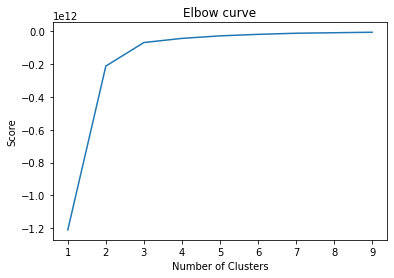

In [40]:
# Plot the elbow curve using PyLab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow curve')
pl.show()

#### From one to three, the curve grows until after three the curve straightens out. The optimal clusters count is a value of three (3).

## 04.3 k-Means Clustering

In [41]:
# Create k-means cluster

kmeans = KMeans(n_clusters = 3)

# When tried to use 'n_jobs' argument for KMeans, the following error appeared: 
# "TypeError: __init__() got an unexpected keyword argument 'n_jobs'"
# This argument is depreciated, therefore this version does not include this argument for KMeans

In [42]:
# Fit the 'kmeans' object to the data

kmeans.fit(bnb_MC_KM)

KMeans(n_clusters=3)

In [43]:
# Createa column with the clusters values to visualize data

bnb_MC_KM['cluster'] = kmeans.fit_predict(bnb_MC_KM)

/var/folders/jw/m4xyglrx2lzdcm7rs6z302nm0000gn/T/ipykernel_4879/930843787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnb_MC_KM['cluster'] = kmeans.fit_predict(bnb_MC_KM)


In [44]:
# Verify new variable 

bnb_MC_KM.head()

,acceptance_rate,host_listings_count,latitude,longitude,bedrooms,price,min_nights,availability_365,revs_num,reviews_per_month,bookings_num,room_type_code,nh_code,cluster
0,91,2,19.41095,-99.24418,1,800,1,179,1,0.02,365,1,1,0
1,66,9,19.41162,-99.17794,5,18000,1,347,56,0.43,365,2,2,0
2,100,3,19.42641,-99.22591,1,1779,1,222,5,0.14,365,1,1,0
3,90,2,19.43977,-99.15605,1,650,2,344,72,0.53,365,2,2,0
4,29,1,19.42113,-99.15955,1,2019,7,47,45,0.35,365,2,2,0


In [45]:
# Count values for each cluster

bnb_MC_KM['cluster'].value_counts()

0    17670
2        8
1        1
Name: cluster, dtype: int64

#### It's odd that most of the data points are clustered in on group (17,670/17,679), and that there are only 9 values between the other two clusters (9/17,979; 1/17,679).

#### The 'bnb_MC_KM' subset was made in several different ways, including taking off variables such as 'latitude', 'longitude', 'reviews_per_month', and 'bbookings_num', nonetheless, the clusetrs shown the same distribution.

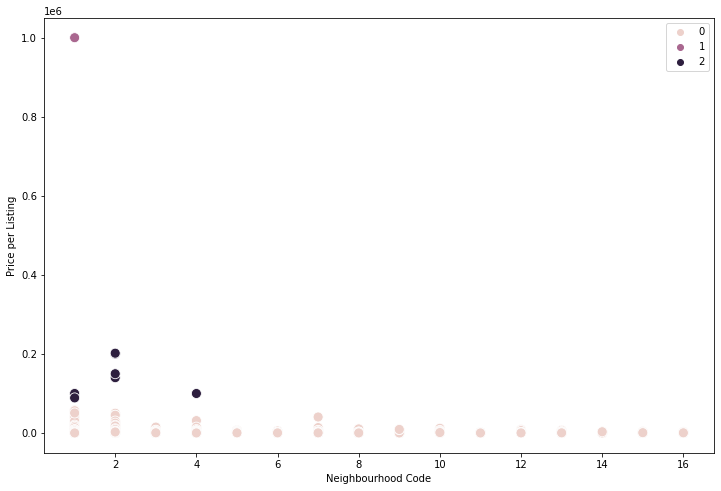

In [46]:
# Plot the clsuters for the X'nh_code' and y'price' variables

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = bnb_MC_KM['nh_code'], y = bnb_MC_KM['price'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Neighbourhood Code')
plt.ylabel('Price per Listing')
plt.show()

#### After some research, turns out thse three neighbourhoods (1, 2, and 4) are high-medium to high class, which might explain why the highest prices are among these three neighbourhoods.

#### Again, the fact the clusters are not evenly distributed make difficult to intepret if these plots are fit to explain reality.

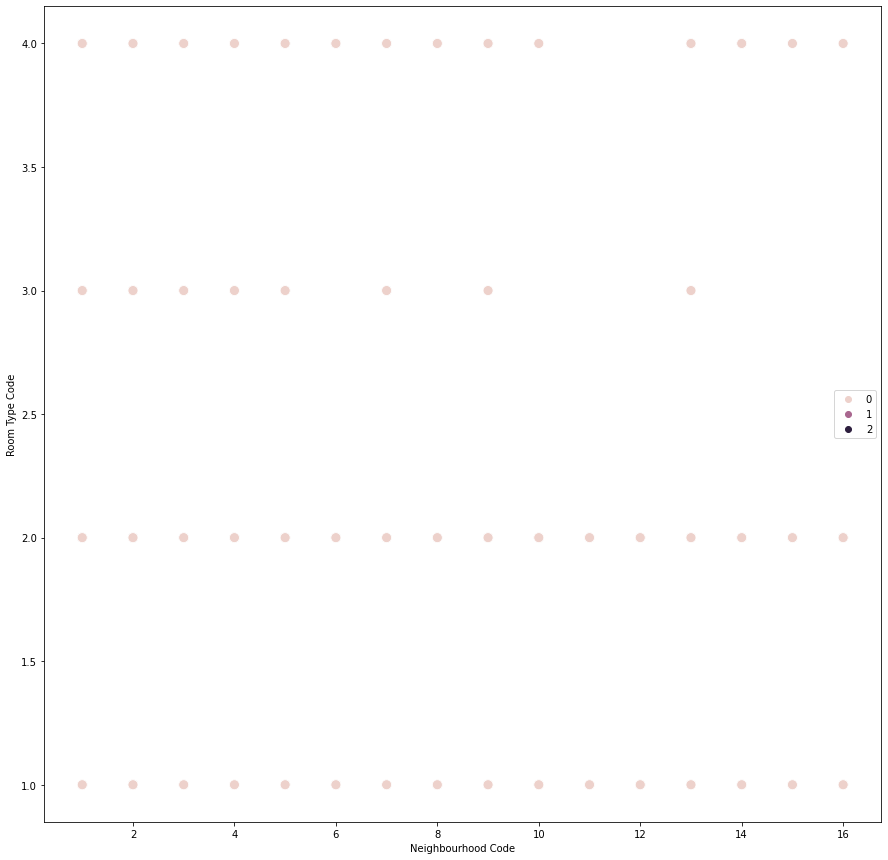

In [47]:
# Plot the clusters for the X'nh_code' and y'room_type_code'

plt.figure(figsize = (15, 15))
ax = sns.scatterplot(x=bnb_MC_KM['nh_code'], y=bnb_MC_KM['room_type_code'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Neighbourhood Code')
plt.ylabel('Room Type Code')
plt.show()

#### This plot shows how the listings by room type are distributed along the neighbourhoods. The nine values from the other two clusters cannot even be visualized.

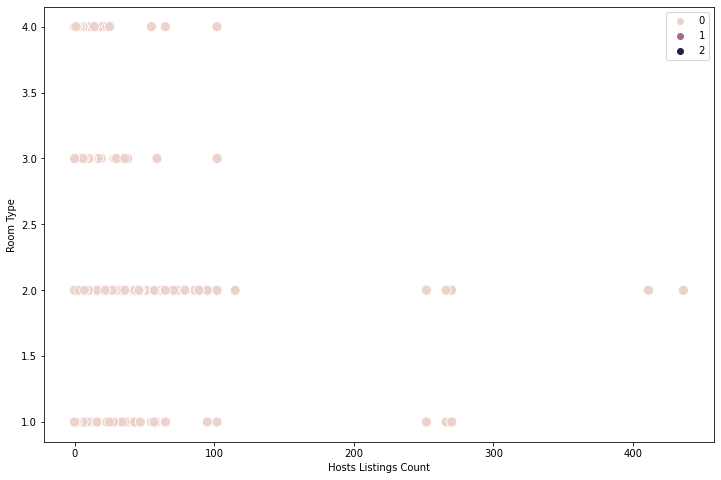

In [48]:
# Plot the clusters for the X'host_listings_count' and y'room_type_code'

plt.figure(figsize = (12, 8))
sns.scatterplot(x = bnb_MC_KM['host_listings_count'], y = bnb_MC_KM['room_type_code'], hue= kmeans.labels_, s = 100)
                
ax.grid(False)
plt.xlabel('Hosts Listings Count')
plt.ylabel('Room Type')
plt.show()

#### Whith this plot it was expeted to get some insights that could explain the two smaller clusters of listings counts per host, but does not show valuable information that can explain any tendency such as more hosts turning from a shared-economy model into a full standradr business.

### Other type of scatterplots base on 'longitude and latitude will be plotted as follows in hopes to get more insights from data points distribution.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

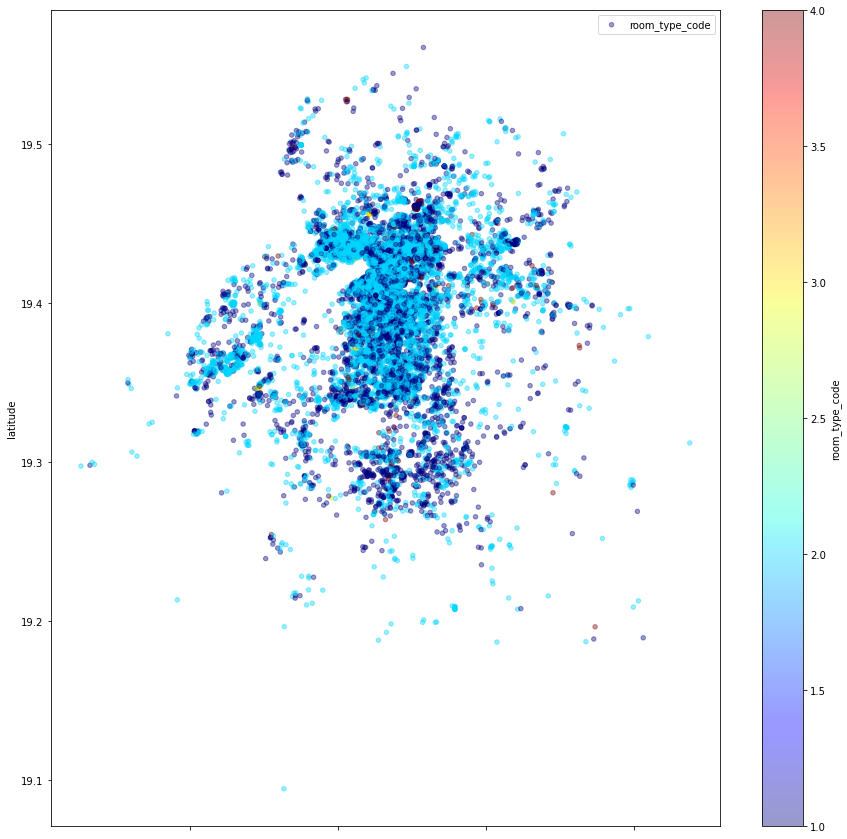

In [49]:
bnb_MC_KM.plot(kind='scatter', x='longitude', y='latitude', label='room_type_code', c='room_type_code',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(15,15))

#### In the plot above can be observed that most of the listings are Entire homes or apartemnts.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

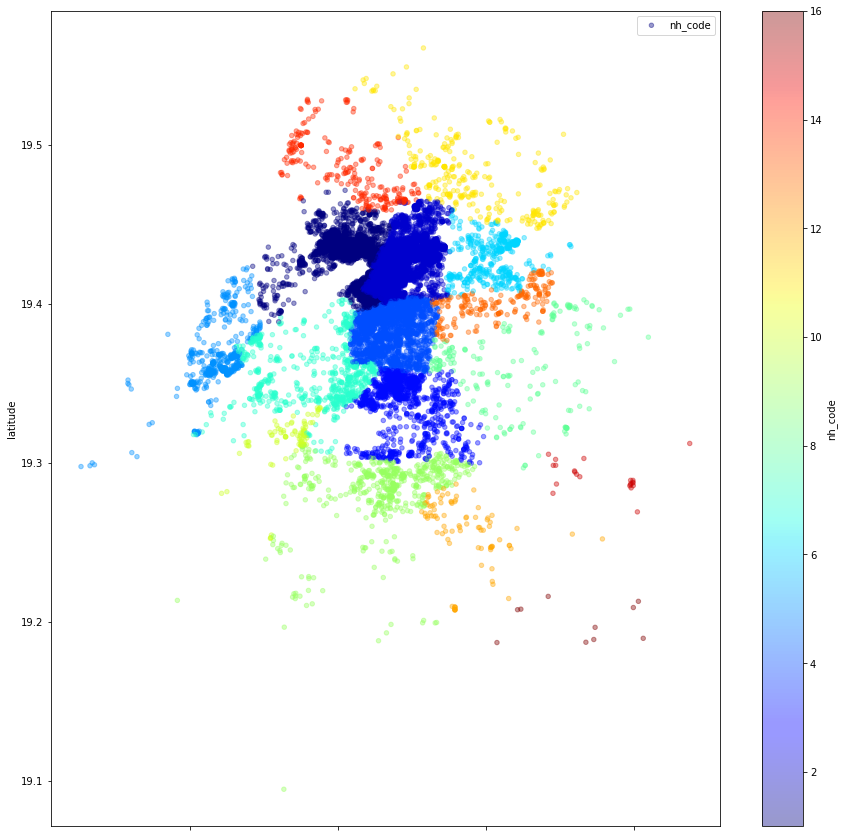

In [50]:
bnb_MC_KM.plot(kind='scatter', x='longitude', y='latitude', label='nh_code', c='nh_code',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(15,15))

#### As data points are distributed based on longitude and latitude, the different clusters represent a different neighbourhood.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

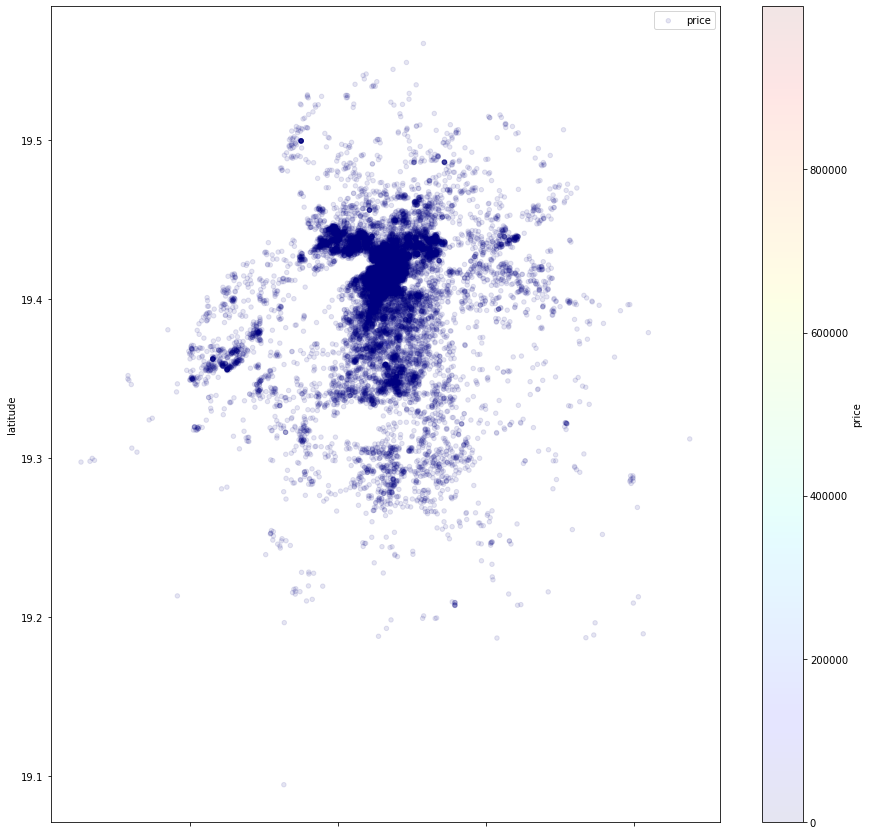

In [51]:
bnb_MC_KM.plot(kind='scatter', x='longitude', y='latitude', label='price', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.1, figsize=(15,15))

#### Most of the prices are within the same range (the argument alpha is equal to .1 so different data points can be distinguished more easily. This plot shows that the prices, generally speaking, are competitive, therefore most of them are within the same range. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

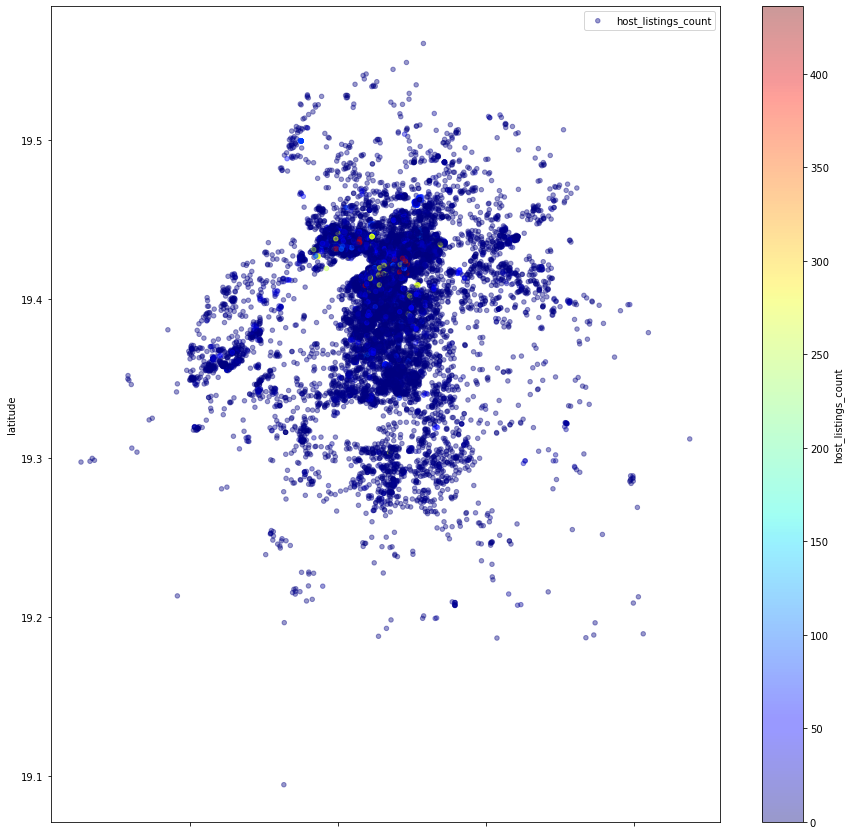

In [52]:
bnb_MC_KM.plot(kind='scatter', x='longitude', y='latitude', label='host_listings_count', c='host_listings_count',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(15,15))

#### This plot show with more clarity that the most of the hosts hold one or very few listings, and that there are only a few hosts that hold as much as 250 to over 400 listings.

#### The variable 'hosts_listings_count' need to be further investigated.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

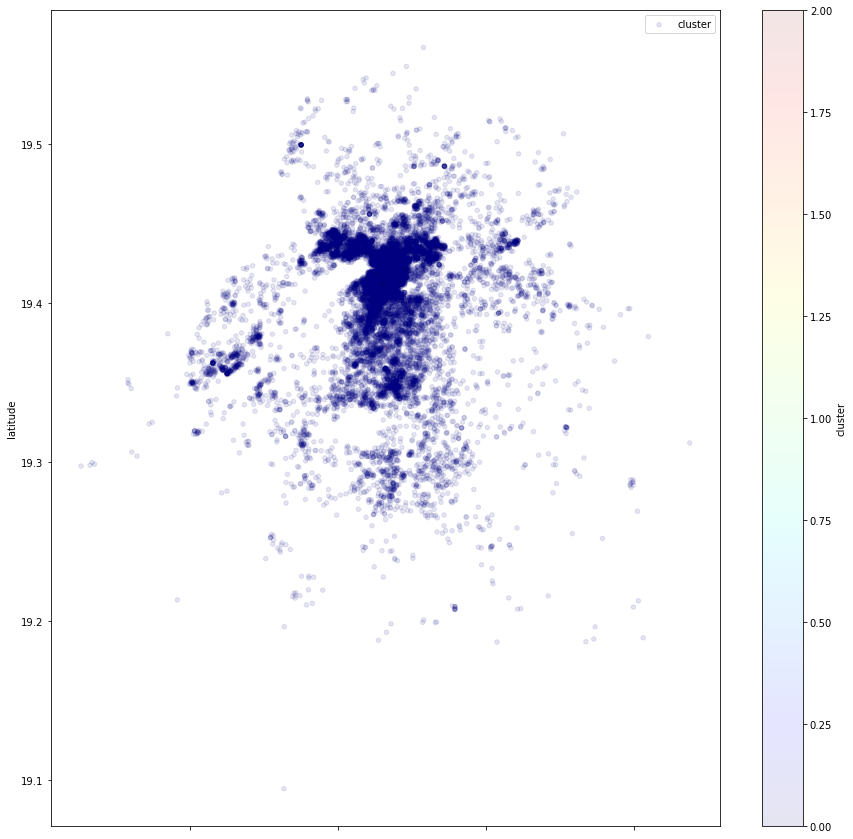

In [53]:
bnb_MC_KM.plot(kind='scatter', x='longitude', y='latitude', label='cluster', c='cluster',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.1, figsize=(15,15))

#### How the cluseters' data points are distributed along Mexico City? This plot shows such distribution.

### Though both types of plots are useful in their own way and have the potential to unveal useful insights, the fact the one of the clusters hold areound 99.94% of the data points might say further investigation may need to be done to corroborate the infomration is properly set to perfor with this Unsupervised Machine Learning Model.

In [54]:
list(bnb_MC_KM.cluster.unique())

[0, 2, 1]

In [55]:
bnb_MC_KM.loc[bnb_MC_KM['cluster'] == 0, 'cluster_color'] = 'pink-0'
bnb_MC_KM.loc[bnb_MC_KM['cluster'] == 1, 'cluster_color'] = 'purple-1'
bnb_MC_KM.loc[bnb_MC_KM['cluster'] == 2, 'cluster_color'] = 'dark purple-2'

/var/folders/jw/m4xyglrx2lzdcm7rs6z302nm0000gn/T/ipykernel_4879/2362876887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnb_MC_KM.loc[bnb_MC_KM['cluster'] == 0, 'cluster_color'] = 'pink-0'


In [56]:
list(bnb_MC_KM.columns)

['acceptance_rate',
 'host_listings_count',
 'latitude',
 'longitude',
 'bedrooms',
 'price',
 'min_nights',
 'availability_365',
 'revs_num',
 'reviews_per_month',
 'bookings_num',
 'room_type_code',
 'nh_code',
 'cluster',
 'cluster_color']

In [57]:
bnb_MC_KM.groupby('cluster_color').agg({'acceptance_rate' : ['mean', 'median'],
                                       'host_listings_count': ['mean', 'median'],
                                       'bedrooms' : ['mean', 'median'],
                                       'price' : ['mean', 'median'],
                                       'min_nights': ['mean', 'median'],
                                       'availability_365': ['mean', 'median'],
                                       'revs_num': ['mean', 'median'],
                                       'reviews_per_month': ['mean', 'median'],
                                       'bookings_num': ['mean', 'median'],
                                       'room_type_code': ['mean', 'median'],
                                       'nh_code': ['mean', 'median'],
                                       'cluster': ['mean', 'median']})

acceptance_rate        host_listings_count         bedrooms  \
                         mean median                mean median      mean   
cluster_color                                                               
dark purple-2       99.250000  100.0            39.50000    9.0     2.375   
pink-0              90.888285   99.0            15.64652    2.0  3.810753   
purple-1           100.000000  100.0             9.00000    9.0       2.0   

                              price           min_nights         ...  \
              median           mean    median       mean median  ...   
cluster_color                                                    ...   
dark purple-2    2.0  135101.250000  119999.0  47.000000    2.0  ...   
pink-0           1.0    1239.134239     894.0   3.529089    2.0  ...   
purple-1         2.0  999998.000000  999998.0   3.000000    3.0  ...   

              reviews_per_month        bookings_num        room_type_code  \
                           mean median         mean median           mean   
cluster_color                                                               
dark purple-2          0.796250  0.735   365.000000  365.0          1.875   
pink-0                 1.586478  1.000   365.000057  365.0       1.696887   
purple-1               0.030000  0.030   365.000000  365.0            2.0   

                       nh_code        cluster         
              median      mean median    mean median  
cluster_color                                         
dark purple-2    2.0     1.875    2.0     2.0    2.0  
pink-0           2.0  3.443633    2.0     0.0    0.0  
purple-1         2.0       1.0    1.0     1.0    1.0  

[3 rows x 24 columns]

### Considering over 99 percent of the data points are clustered within one single group, these results are not useful. 

# 05 Importing Dataframes

In [58]:
bnb_MC.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '14_Sep_2022', 'bnb_MC_140922.pkl'))

In [59]:
bnb_MC.to_csv(os.path.join(path, '02 Data', 'Prepared Data', '14_Sep_2022', 'bnb_MC_140922.csv'))